In [43]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot


In [45]:
from sklearn import metrics

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.linear_model import LogisticRegression

In [139]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
Datos = pandas.read_csv('C:/Users/DANIEL/OneDrive/Documentos/UNAD/sexto semestre/Analisis de datos/UNIDAD 1/Tarea3/heart_cleveland_upload.csv')

In [55]:
Datos.head (15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [57]:
Datos.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

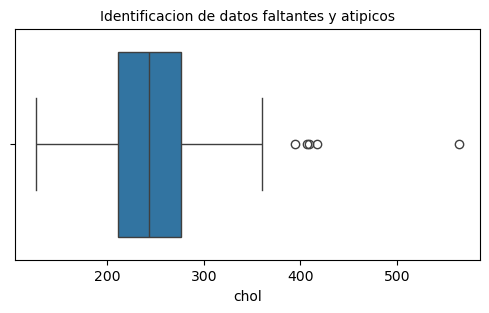

In [59]:
matplotlib.pyplot.figure(figsize=(6, 3))
seaborn.boxplot(x=Datos['chol'])
matplotlib.pyplot.title('Identificacion de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

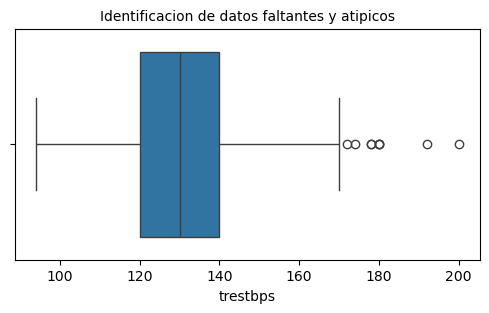

In [61]:
matplotlib.pyplot.figure(figsize=(6, 3))
seaborn.boxplot(x=Datos['trestbps'])
matplotlib.pyplot.title('Identificacion de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

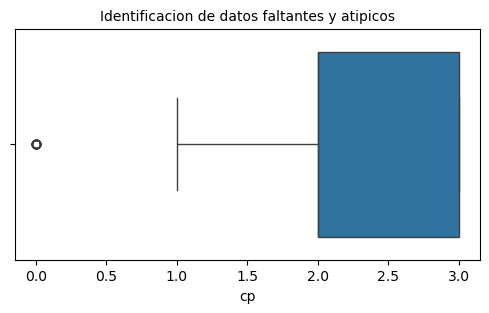

In [63]:
matplotlib.pyplot.figure(figsize=(6, 3))
seaborn.boxplot(x=Datos['cp'])
matplotlib.pyplot.title('Identificacion de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

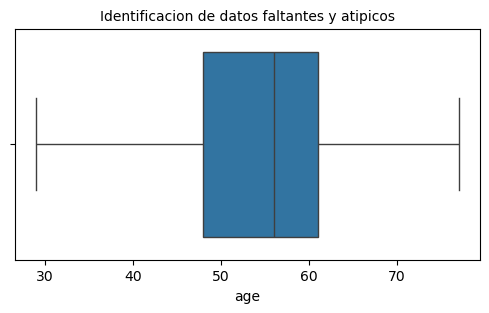

In [65]:
matplotlib.pyplot.figure(figsize=(6, 3))
seaborn.boxplot(x=Datos['age'])
matplotlib.pyplot.title('Identificacion de datos faltantes y atipicos', fontsize=10)

In [67]:
print("cantidad de requistros con cero presion arterial en reposo:", Datos['trestbps'].isin([0]).sum())
print("cantidad de requistros con cero frecuencia cardiaca maxima alcanzada:", Datos['thalach'].isin([0]).sum())
print("cantidad de requistros con cero colesterol:", Datos['chol'].isin([0]).sum())
print("cantidad de requistros con cero edad:", Datos['age'].isin([0]).sum())

cantidad de requistros con cero presion arterial en reposo: 0
cantidad de requistros con cero frecuencia cardiaca maxima alcanzada: 0
cantidad de requistros con cero colesterol: 0
cantidad de requistros con cero edad: 0


In [69]:
colesterol_minimo=100
colesterol_maximo=360
total_atipicos=((Datos['chol']<colesterol_minimo)|(Datos['chol']>colesterol_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))

el total de datos atipicos es 5


In [83]:
Datos=Datos[(Datos['chol']<colesterol_maximo)&(Datos['chol']>colesterol_minimo)]

In [85]:
colesterol_minimo=100
colesterol_maximo=360
total_atipicos=((Datos['chol']<colesterol_minimo)|(Datos['chol']>colesterol_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))

el total de datos atipicos es 0


In [87]:
presionArterial_minimo=90
PresionArterial_maximo=190
total_atipicos=((Datos['trestbps']<presionArterial_minimo)|(Datos['trestbps']>PresionArterial_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))

el total de datos atipicos es 2


In [91]:
Datos=Datos[(Datos['trestbps']<PresionArterial_maximo)&(Datos['trestbps']>presionArterial_minimo)]

In [93]:
presionArterial_minimo=90
PresionArterial_maximo=190
total_atipicos=((Datos['trestbps']<presionArterial_minimo)|(Datos['trestbps']>PresionArterial_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))

el total de datos atipicos es 0


In [95]:
edad_minimo=20
edad_maximo=80
total_atipicos=((Datos['age']<edad_minimo)|(Datos['age']>edad_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))

el total de datos atipicos es 0


In [99]:
Datos['condition'].value_counts()

condition
0    156
1    133
Name: count, dtype: int64

In [107]:
x=Datos.drop('condition', axis=1)
y=Datos['condition']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, stratify=y,random_state=0)

In [105]:
print (x_train)
print (x_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
275   45    1   3       104   208    0        2      148      1      3.0   
22    34    1   0       118   182    0        2      174      0      0.0   
93    60    1   2       140   185    0        2      155      0      3.0   
292   40    1   3       152   223    0        0      181      0      0.0   
69    35    1   1       122   192    0        0      174      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
143   43    1   2       130   315    0        0      162      0      1.9   
202   60    1   3       140   293    0        2      170      0      1.2   
240   55    1   3       132   353    0        0      132      1      1.2   
181   63    0   3       108   269    0        0      169      1      1.8   
233   57    1   3       132   207    0        0      168      1      0.0   

     slope  ca  thal  
275      1   0     0  
22       0   0     0  
93       1   0    

In [111]:
modelo_regresion=LogisticRegression(solver="liblinear")
modelo_regresion.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [113]:
prediccion=modelo_regresion.predict(x_test)

In [119]:
x_test.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
222,58,1,3,100,234,0,0,156,0,0.1,0,1,2
14,56,1,0,120,193,0,2,162,0,1.9,1,0,2
114,53,1,2,130,197,1,2,152,0,1.2,2,0,0
135,46,0,2,142,177,0,2,160,1,1.4,2,0,0
170,65,0,3,150,225,0,2,114,0,1.0,1,3,2
33,57,0,1,130,236,0,2,174,0,0.0,1,1,0
216,58,1,3,128,259,0,2,130,1,3.0,1,2,2
193,61,0,3,145,307,0,2,146,1,1.0,1,0,2
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2
259,51,0,3,130,305,0,0,142,1,1.2,1,0,2


In [121]:
print (prediccion)

[1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1
 1 0 1 0 0 0 0 0 0 1 1 0 1]


In [125]:
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        47
           1       0.87      0.82      0.85        40

    accuracy                           0.86        87
   macro avg       0.86      0.86      0.86        87
weighted avg       0.86      0.86      0.86        87



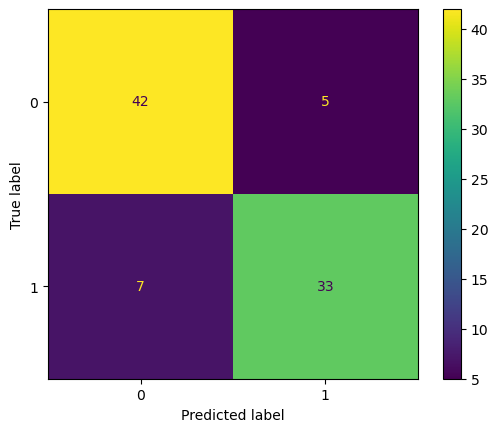

In [129]:
cm=confusion_matrix(y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

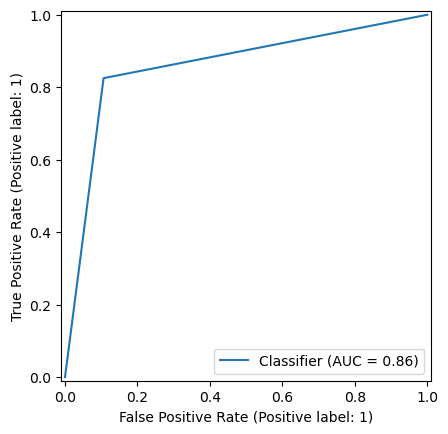

In [153]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,prediccion)
matplotlib.pyplot.show()